In [38]:
# DATA MINING ASSESSMENT

In [36]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# import data
data = pd.read_csv("train.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [32]:
# Data understanding 

In [31]:
#data shape gives us the amount of rows and the amount of columns of the dataset 
data.shape


(43957, 15)

In [10]:
# summay statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43957.0,38.617149,13.734401,17.0,28.0,37.0,48.0,90.0
fnlwgt,43957.0,189673.004368,105821.522560,13492.0,117496.0,178100.0,237671.0,1490400.0
educational-num,43957.0,10.074118,2.575092,1.0,9.0,10.0,12.0,16.0
capital-gain,43957.0,1093.559797,7570.536063,0.0,0.0,0.0,0.0,99999.0
capital-loss,43957.0,88.246491,404.588410,0.0,0.0,0.0,0.0,4356.0
hours-per-week,43957.0,40.407694,12.400303,1.0,40.0,40.0,45.0,99.0
income_>50K,43957.0,0.239279,0.426648,0.0,0.0,0.0,0.0,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [33]:
# Data preparation
# Handling missing values 
# Outliers
# Duplicates

In [13]:
# check null values
data.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [14]:
# copy from the dataframe
df = data.copy()

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [16]:
# sum of nulls per column
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [17]:
# check nulls: nulls are all on the same rows, drop rows because it's only a small amount of the total rows

In [18]:
# drop rows that have nulls
df.dropna(inplace= True)

In [19]:
df.shape

(40727, 15)

In [20]:
# check duplicated rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43952    False
43953    False
43954    False
43955    False
43956    False
Length: 40727, dtype: bool

In [21]:
df.duplicated().sum()

41

In [22]:
# drop duplicates because it looks at the whole row, so we can assume all columns on each row are exactly the same
df.drop_duplicates(inplace= True)

In [23]:
df.shape

(40686, 15)

In [24]:
# Select the categorical columns to create dummies for
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [25]:
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
# Dummy variables are necessary because machine learning algorithms can't understand categorical variables.

In [26]:
# Define the target variable and features
X = df.drop('income_>50K', axis=1)  # Features
y = df['income_>50K']  # Target variable

In [ ]:
# Target variable = variable we want to predict 
# Feature = all the variables we want to use to predict the target

In [27]:
#Split dataset into train data and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape

((32548, 104), (8138, 104))

In [ ]:
# Logisitical Regression

In [24]:
# Import necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the entire dataset
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[5944  193]
 [1495  506]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6137
           1       0.72      0.25      0.37      2001

    accuracy                           0.79      8138
   macro avg       0.76      0.61      0.63      8138
weighted avg       0.78      0.79      0.75      8138



In [ ]:
# Class 0: 5944 correct predictions, 193 incorrect predictions
# Class 1: 1495 correct predictions, 506 incorrect predictions
# Overall accuracy of 79% of the data points 
# Better performance on class 0, probabily because of fewer datapoints in class 1

In [ ]:
# Naive Bayes

In [25]:
# Import necessary libraries for Naive Bayes 
from sklearn.naive_bayes import GaussianNB

# Train a Naive Bayes classifier (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions using Naive Bayes
nb_predictions = nb_model.predict(X_test)

# Evaluate Naive Bayes model
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("\nClassification Report:\n", classification_report(y_test, nb_predictions))

Confusion Matrix:
 [[5832  305]
 [1401  600]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      6137
           1       0.66      0.30      0.41      2001

    accuracy                           0.79      8138
   macro avg       0.73      0.63      0.64      8138
weighted avg       0.77      0.79      0.76      8138



In [ ]:
# Class 0: 5832 correct predictions, 305 incorrect predictions
# Class 1: 1401 correct predictions, 600 incorrect predictions
# Overall accuracy of 79% of the data points 

In [ ]:
# K-Nearest Neighbors

In [26]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions using KNN
knn_predictions = knn_model.predict(X_test)

# Evaluate KNN model
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("\nClassification Report:\n", classification_report(y_test, knn_predictions))

Confusion Matrix:
 [[5619  518]
 [1353  648]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      6137
           1       0.56      0.32      0.41      2001

    accuracy                           0.77      8138
   macro avg       0.68      0.62      0.63      8138
weighted avg       0.74      0.77      0.75      8138



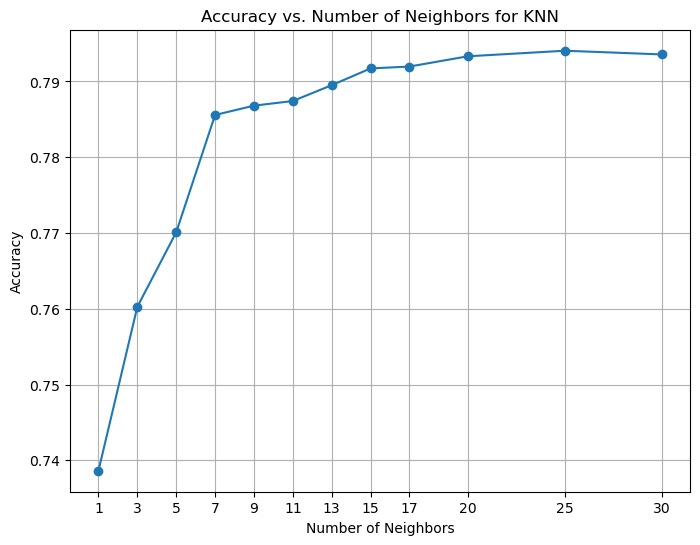

In [30]:
# Define a list of different numbers of neighbors to try
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 25, 30]

# Initialize lists to store accuracy values
accuracy_values = []

# Train and evaluate KNN models with different numbers of neighbors
for n_neighbors in neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    accuracy_values.append(knn_accuracy)

# Plot accuracy versus number of neighbors
plt.figure(figsize=(8, 6))
plt.plot(neighbors_list, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(neighbors_list)
plt.show()

In [ ]:
# Choosing 25 neighbors (similar data points), as it is giving the most accuracy percentage

In [31]:
# Train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train, y_train)

# Make predictions using KNN
knn_predictions = knn_model.predict(X_test)

# Evaluate KNN model
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("\nClassification Report:\n", classification_report(y_test, knn_predictions))

Confusion Matrix:
 [[6043   94]
 [1582  419]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      6137
           1       0.82      0.21      0.33      2001

    accuracy                           0.79      8138
   macro avg       0.80      0.60      0.61      8138
weighted avg       0.80      0.79      0.74      8138



In [ ]:
# Comparison Logistical Regression, Naive Bayes and K-Nearest Neighbors

#KNN has the highest precision for Class 0, but lowest recall for Class 1 --> Good at identifying datapoint in Class 0, but is bad at identifying in Class 1.
#NB has the highest recall for Class 0, lowest precision for Class 1. NB is good at finding all of the data points in Class 0, but sometimes wrongly classifies Class 1 as Class 0
#LR has a good balance for precision and recall for both classes. LR is good at identifying both classes. 

# for this problem, Logistical regression is probably the best algorithm to use.
